#### Importing packages

In [1]:
import warnings    
warnings.simplefilter("ignore", UserWarning)
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns
from sklearn.impute import KNNImputer 
from src.utils import previous_owners, convert_text_to_number,\
    passengers_number, outlier_detector,\
    outlier_detector_zscore 

### reading data

In [8]:
data = pd.read_csv('../data/cars_data.csv')

In [9]:
data.head()

,السعر,الموديل,موديل سنة,لون السيارة,قوة الماتور,عدد الركاب,عداد السيارة,أصحاب سابقون,أصل السيارة,رخصة السيارة,...,الزجاج,سعر التأمين,وسادة حماية هوائية,فرش جلد,جنطات مغنيسيوم,فتحة سقف,مسجل CD,إغلاق مركزي,مُكيّف,جهاز إنذار
0,100000.0,كيا اوبتيما,2014,أبيض عاجي,2000.0,4+1,75000,يد اولى,خصوصي,فلسطينية,...,الكتروني,3090,1,1,1,1,1,1,1,1
1,60000.0,كيا سورينتو,2007,سكني,2500.0,7+1,130000,2,خصوصي,فلسطينية,...,الكتروني,2740,1,1,1,1,1,1,1,1
2,43500.0,هونداي افانتي,2006,سكني,1600.0,NaN,NaN,NaN,خصوصي,فلسطينية,...,الكتروني,2340,1,1,1,0,1,1,1,1
3,5500.0,فيات 127,1982,بيج,906.0,4+1,شغال,00,خصوصي,فلسطينية,...,يدوي,967,0,0,0,0,1,0,1,0
4,54000.0,بيجو 208,2014,فضي,1200.0,4+1,38000,NaN,خصوصي,فلسطينية,...,الكتروني,2035,1,0,1,0,0,1,1,1


In [10]:
#get the shape of the data
data.shape

(6864, 22)

there are 6864 samples and 22 features

In [11]:
#check the data type for each feature 
data.dtypes

السعر                 float64
الموديل                object
موديل سنة               int64
لون السيارة            object
قوة الماتور           float64
عدد الركاب             object
عداد السيارة           object
أصحاب سابقون           object
أصل السيارة            object
رخصة السيارة           object
نوع الوقود             object
نوع الجير              object
الزجاج                 object
سعر التأمين             int64
وسادة حماية هوائية      int64
فرش جلد                 int64
جنطات مغنيسيوم          int64
فتحة سقف                int64
مسجل CD                 int64
إغلاق مركزي             int64
مُكيّف                  int64
جهاز إنذار              int64
dtype: object

- There are 7 numeric features but some of them are of type object such as 'عدد الركاب', So I'll turn them into numeric.
- There are 15 categorical feature


# Features Preprocessing

In [12]:
#Since the insurance depends on the target variable, I should not use it in prediction 
data.drop(columns = ['سعر التأمين'], inplace = True)
data.head()

,السعر,الموديل,موديل سنة,لون السيارة,قوة الماتور,عدد الركاب,عداد السيارة,أصحاب سابقون,أصل السيارة,رخصة السيارة,...,نوع الجير,الزجاج,وسادة حماية هوائية,فرش جلد,جنطات مغنيسيوم,فتحة سقف,مسجل CD,إغلاق مركزي,مُكيّف,جهاز إنذار
0,100000.0,كيا اوبتيما,2014,أبيض عاجي,2000.0,4+1,75000,يد اولى,خصوصي,فلسطينية,...,اوتوماتيك,الكتروني,1,1,1,1,1,1,1,1
1,60000.0,كيا سورينتو,2007,سكني,2500.0,7+1,130000,2,خصوصي,فلسطينية,...,نصف اوتوماتيك,الكتروني,1,1,1,1,1,1,1,1
2,43500.0,هونداي افانتي,2006,سكني,1600.0,NaN,NaN,NaN,خصوصي,فلسطينية,...,اوتوماتيك,الكتروني,1,1,1,0,1,1,1,1
3,5500.0,فيات 127,1982,بيج,906.0,4+1,شغال,00,خصوصي,فلسطينية,...,عادي,يدوي,0,0,0,0,1,0,1,0
4,54000.0,بيجو 208,2014,فضي,1200.0,4+1,38000,NaN,خصوصي,فلسطينية,...,اوتوماتيك,الكتروني,1,0,1,0,0,1,1,1


#### Get a closer look to numeric data that have object type

- عدد الركاب

In [13]:
#check the unique values in 'عدد الركاب' feature 
data['عدد الركاب'].unique()

array(['4+1 ', '7+1 ', nan, '4+1  ', '5+1 ', '٤+١ ', '8 ', '6+1 ', '4+١ ',
       '٧ ', '7,+ 1 ', '7:1 ', '1+7 ', '١+٤ ', '2+1 ', '6+١ ', '+1 ',
       '6±١ ', '22 ', '1+1 ', '٥+١ ', '٧+1 ', '5+2 ', 'مثال: 4 + 1 ',
       '7.1 ', '7 =1 ', '٧+١ ', '1+2 ', '6x1     ', '1+٤ ', '4+1   ',
       '2/1 ', '8+1 ', '٨+١ ', '٦+١ ', '2 ', '4+2 ', '1٠4 ', '4\\١ ',
       '000 ', '3+1 ', '1 ', 'اكثر من 10 ', '9+1 '], dtype=object)

As shown in the previous cell passengers number presented as a string so I'll use passengers_number function to convert them to numeric data

In [14]:
#convert the equation to valid number 
data['عدد الركاب'] = data['عدد الركاب'].map(passengers_number)

In [15]:
#check the type
data['عدد الركاب'].dtypes

dtype('float64')

In [16]:
#another check the unique values
data['عدد الركاب'].unique() 

array([  5.,   8.,  nan,   6.,   7.,   3.,   1.,  22.,   2.,   9., 104.,
         0.,   4.,  11.,  10.])

It seems there are some noise data, I'll handle them in data cleaning 

- عداد السيارة

In [17]:
#convert values to float using convert_text_to_number function
data['عداد السيارة'] = data['عداد السيارة'].map(convert_text_to_number)

In [18]:
#check the type
data['عداد السيارة'].dtypes

dtype('float64')

- أصحاب سابقون

In [19]:
#check for unique values to figure out data pattern
data['أصحاب سابقون'].unique()

array(['يد اولى ', '2 ', nan, '00  ', '0 ', '1 ', 'يد ثانية ', '4 ',
       'يد ثانيه ', '3 ', 'ثالثة ', 'غير منمر استيراد الماني ', '00 ',
       'غير منمرة ', 'أولى ', '٨ ', 'يد اولا ', 'يد ثالثة ', 'يد ثالثة  ',
       'ثانية ', 'يد أولى ', 'يد سادسة ', '5 ', 'اولى  ', 'صفر ', '9 ',
       '0000 ', 'رابعه ', 'يد أولى  ', '٤ ', 'يد رابعة  ', '٢ ',
       'يد ثالثه ', '6 ', 'يد اولى  ', '7 ', '... ', 'يد ثانيه  ',
       'يد أولى استيراد ', 'يد اولي 1 ', 'اولى ', '...... ', 'ثانيه ',
       'واحد ', 'اربعة ', 'اولا ', '٣ ', 'غير منمره ', 'يد تالته ', '٦ ',
       'يد رابعه ', 'يد ثالثة ( فتيات) ', '159000 ', '12 ', '- ',
       'مش منمر ', '0 مستورده ', 'يد تانيه ', '10 ', 'يد 1 ', 'مستورد ',
       'يد 4 ', 'يد رابعة ', '00000 ', '١ ', 'استيراد مباشر من كوريا  ',
       'يد خامسة ', '٥ ', 'يد 5 ', '******** ', 'نعم ', 'مش منمرة  ',
       'يد 3 ', ' يد ثانيه ', 'يداولى ', '4  ', 'يد أولى وكالة ',
       'يد خامسه ', 'يد ثانية  ', '٩ ', '٧ ', 'يدو اولى ', 'للبيع  ',
       '8 ', 'يد و

In [20]:
#using previous_owners function to convert the text into float value
data['أصحاب سابقون'] = data['أصحاب سابقون'].map(previous_owners)

In [21]:
#check the type
data['أصحاب سابقون'].dtypes

dtype('float64')

# DAta Cleaning

#### Handling Missing Data

In [22]:
#check missing data percentage for each column
missing_per = data.isna().sum() / data.shape[0]
#Get only columns have missing values
missing_per = missing_per[missing_per > 0]
missing_per

عدد الركاب      0.114510
عداد السيارة    0.293998
أصحاب سابقون    0.252477
dtype: float64

I'll fill the missing values for each column according to it's data

- عداد السيارة

get a closer look on the data to decide the method I wanna use to fill the missings

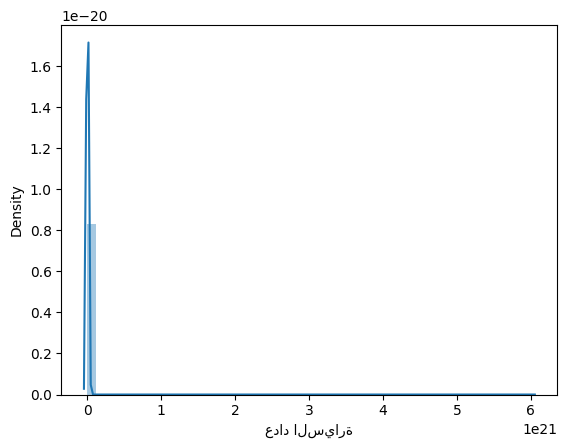

In [23]:
#plot the distribution 
sns.distplot(data['عداد السيارة']) 
plt.xlabel('عداد السيارة') 
plt.show()    

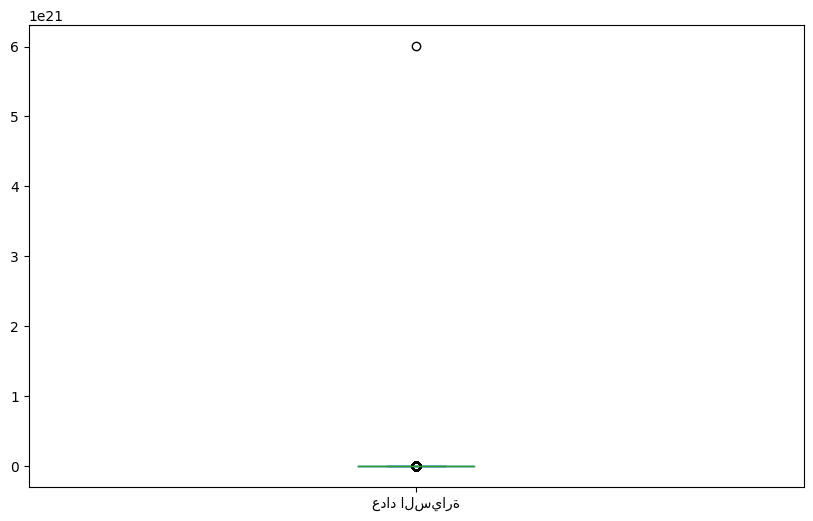

In [24]:
#plot the boxplot 
data['عداد السيارة'].plot.box(figsize = (10,6)) 
plt.show()

There's an extrem outlier that I want to remove

In [25]:
#remove extreme outlier in عداد السيارة feature from the dataset
data = data[~outlier_detector(data, 'عداد السيارة', 1)]  

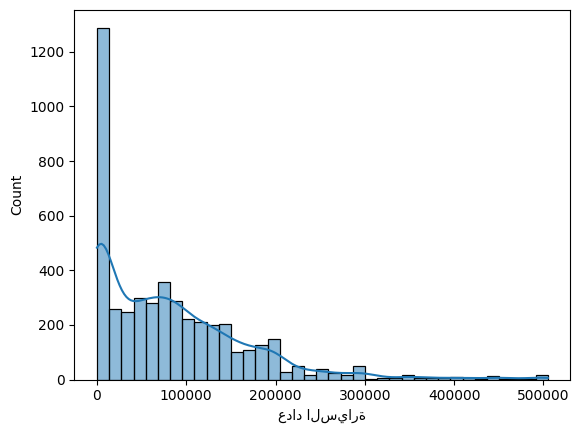

In [26]:
#plot the distribution 
sns.histplot(data['عداد السيارة'], kde=True)
plt.xlabel('عداد السيارة') 
plt.show()

Since this data still skewed, I will fill the missing values using the median, then deal with this skewness using log transformation in feature engineering section

In [27]:
#get the median to use it in filling the missing value
km_counter_median = data['عداد السيارة'].median()
data['عداد السيارة'].fillna(value = km_counter_median, inplace=True)

In [28]:
#make sure the feature doesn't has missing values anymore
data['عداد السيارة'].isna().sum()

0

- عدد الركاب

I'll fill missings using knn imputer based on the car model

In [29]:
#define labelencoder object to encode cars model 
le = LabelEncoder() 

In [30]:
#encode model name
model_encoded = le.fit_transform(data['الموديل'])
#convert labels array to a df so I can pass it with the passengers number
model_encoded = pd.DataFrame(model_encoded, columns = ['الموديل'])
#add passengers number column to model_encoded df
model_encoded  = pd.concat([model_encoded, data[['عدد الركاب']]], axis = 1)
#define a knn imputer object to use in filling missing passengers number according 
#to the nearest neighbours based on car model
imputer = KNNImputer(n_neighbors = 1)
#convert the array to a df after imputing the missing values
clean_df = pd.DataFrame(imputer.fit_transform(model_encoded), columns = model_encoded.columns)

In [31]:
#fill missings in the original df(data)
data['عدد الركاب'] = clean_df['عدد الركاب'].astype(int)

In [32]:
#check if the feature still has missing values
data['عدد الركاب'].isna().sum()

3

since the number of missing values is insegnificant, So I'll drop them

In [33]:
data = data[~data['عدد الركاب'].isna()]         

In [34]:
#check if the feature still has missing values
data['عدد الركاب'].isna().sum()

0

- أصحاب سابقون

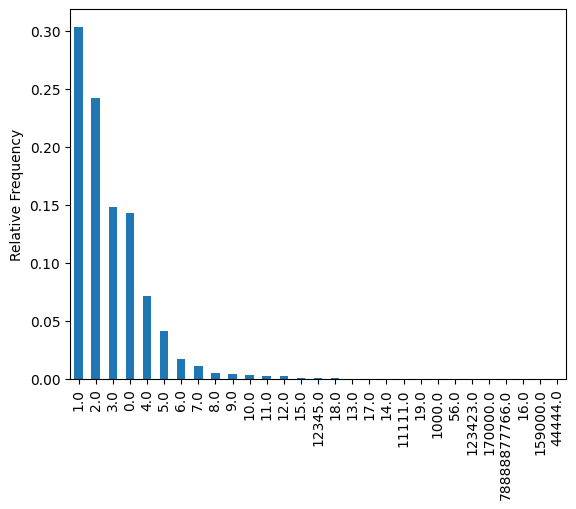

In [35]:
#plot the bar chart to check unique values and thier frequencies
data['أصحاب سابقون'].value_counts(normalize=True).plot.bar()
plt.ylabel("Relative Frequency")
plt.show()

from the chart above, there are some noisy that I'll drop

In [36]:
#drop observations have value of 'أصحاب سابقون' more than 10
data = data[(data['أصحاب سابقون'] <= 10) | (data['أصحاب سابقون'].isna())]

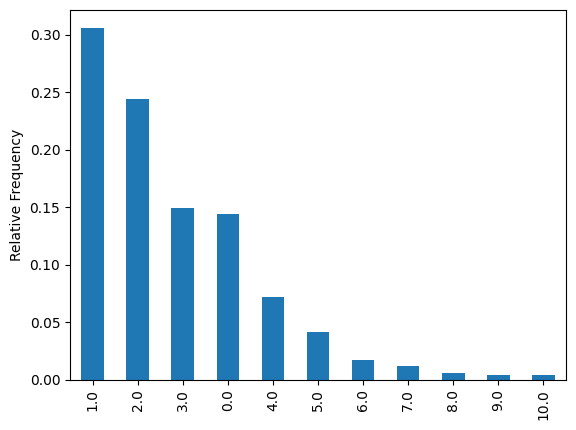

In [37]:
#plot the bar chart to check unique values and thier frequencies
data['أصحاب سابقون'].value_counts(normalize=True).plot.bar()
plt.ylabel("Relative Frequency")
plt.show()

In [38]:
#get the median for this feature
previous_owners_mode = data['أصحاب سابقون'].median()
#fill the missing values using by median
data['أصحاب سابقون'].fillna(value = previous_owners_mode, inplace=True)

In [39]:
data['أصحاب سابقون'].isna().sum()

0

In [40]:
#check is there is a missing value in the dataframe
data.isna().sum().sum() 

0

# EDA

### Numeric Features

##### Motor Power

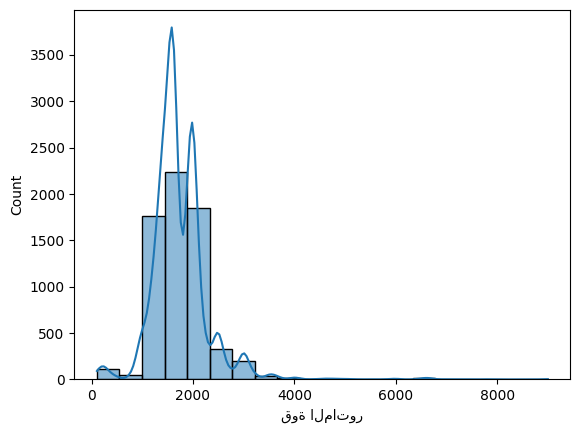

In [41]:
#plot the distribution
sns.histplot(data['قوة الماتور'], bins = 20, kde=True)
plt.xlabel('قوة الماتور') 
plt.show()

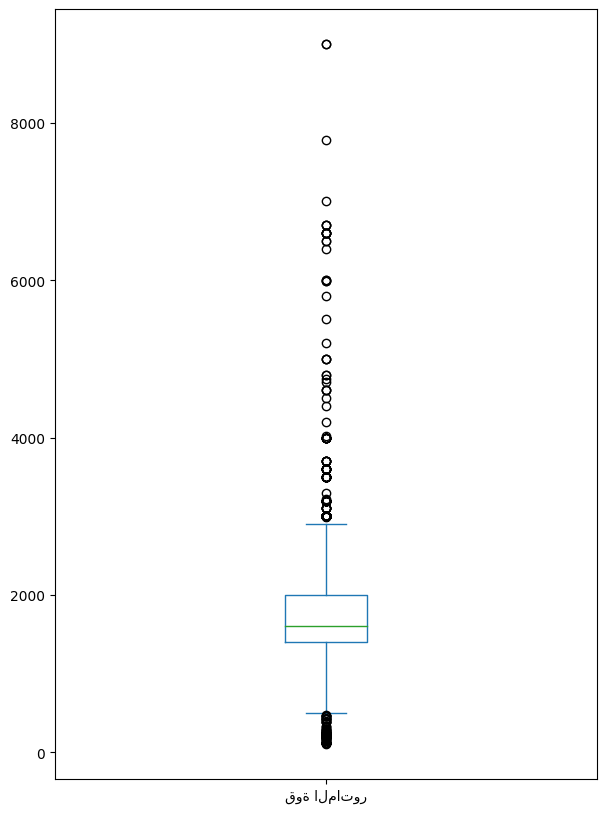

In [42]:
#plot the boxplot 
data['قوة الماتور'].plot.box(figsize = (7,10)) 
plt.show()

the distributin is kind of similler to the normal. from the boxplot there are outliers So I'll remove the extreme ones

In [43]:
data = data[~outlier_detector(data, 'قوة الماتور', 1)] 

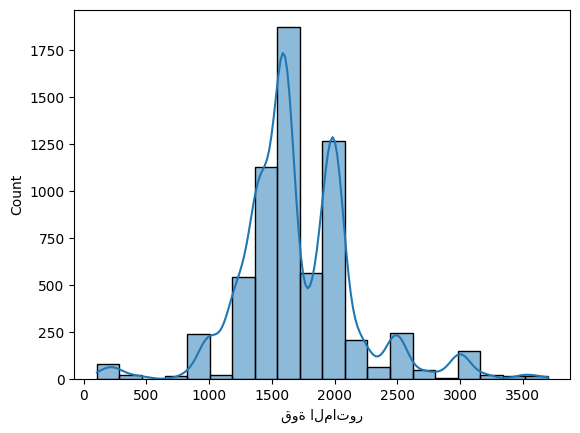

In [44]:
#plot the distribution aftter removing extreme outlier
sns.histplot(data['قوة الماتور'], bins = 20, kde=True)
plt.xlabel('قوة الماتور') 
plt.show()

- موديل سنة

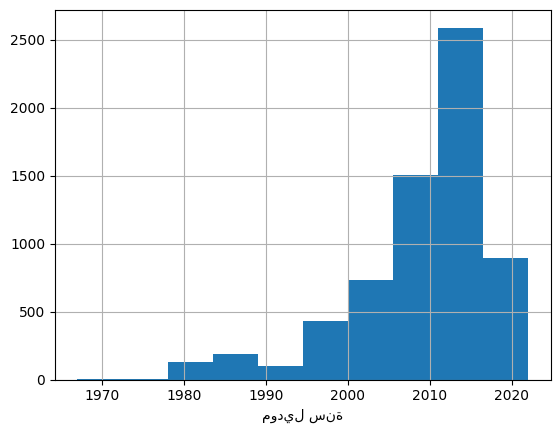

In [45]:
#plot the histogram
data['موديل سنة'].hist()
plt.xlabel('موديل سنة') 
plt.show()

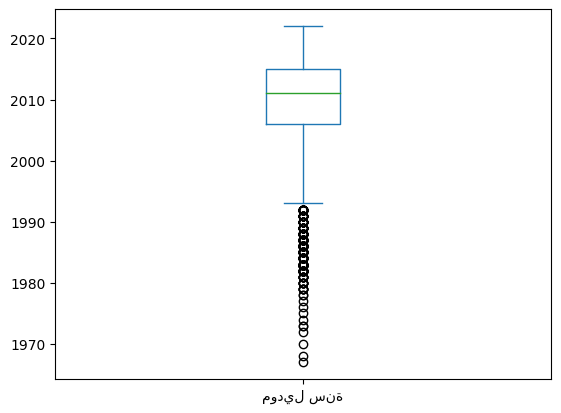

In [46]:
#plot the histogram
data['موديل سنة'].plot.box() 
plt.show()

the distribution is very skewed to the left, I'll remove the extreme outliers only

In [47]:
data = data[~outlier_detector(data, 'موديل سنة', 1)]

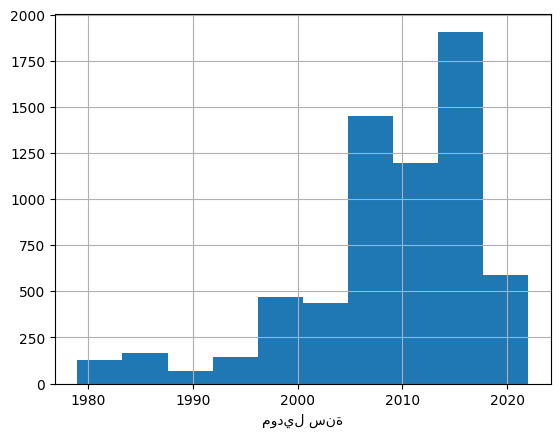

In [48]:
#plot the histogram
data['موديل سنة'].hist()
plt.xlabel('موديل سنة') 
plt.show()

It is still skewed, but it's fine it will be transformed using log transformer so it will reduce the skewness

- السعر

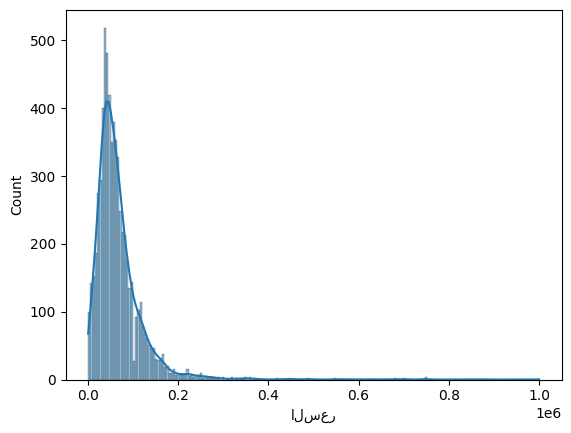

In [49]:
#plot the distribution
sns.histplot(data['السعر'], kde = True)
plt.xlabel('السعر') 
plt.show()

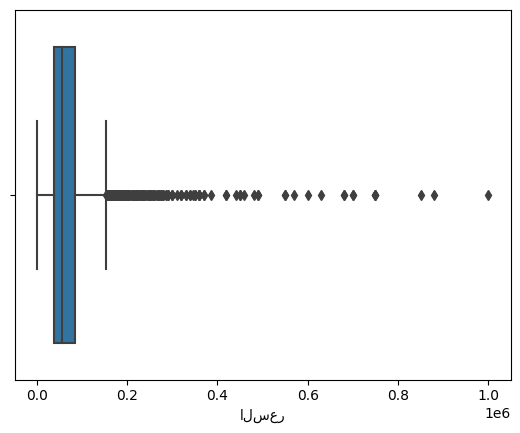

In [50]:
sns.boxplot(data = data, x = 'السعر' )
plt.xlabel('السعر') 
plt.show() 

There are significant outliers and unlogical values So I'll drop them

In [51]:
data = data[~outlier_detector(data, 'السعر', 1)]

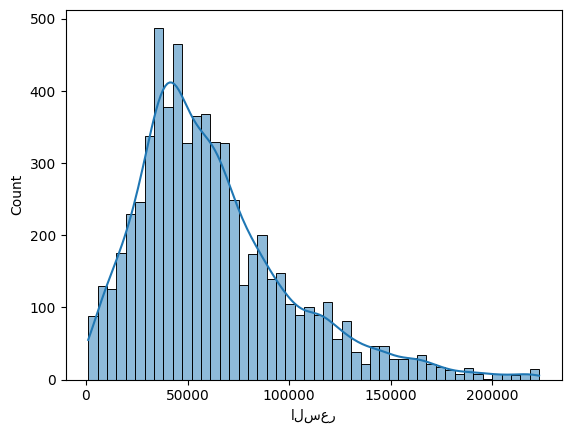

In [52]:
#plot the distribution after dropping the extreme outliers
sns.histplot(data['السعر'], kde = True) 
plt.xlabel('السعر') 
plt.show()

This looks much better

- عدد الركاب

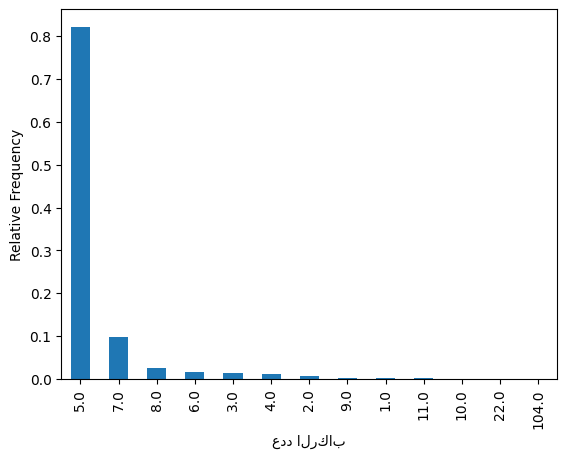

In [53]:
#bar plot for passengers number feature, to check values and thier frequency
data['عدد الركاب'].value_counts(normalize = True).plot.bar()
plt.xlabel('عدد الركاب')
plt.ylabel('Relative Frequency')
plt.show()

as shown in the plot there are noisy data and outliers which I will remove 

In [54]:
data = data[~outlier_detector_zscore(data, 'عدد الركاب')]

#### Categorical Features 

In [55]:
#get categorical features name
categorical_features = [col for col in data.columns if data[col].dtypes == 'O']
categorical_features

['الموديل',
 'لون السيارة',
 'أصل السيارة',
 'رخصة السيارة',
 'نوع الوقود',
 'نوع الجير',
 'الزجاج']

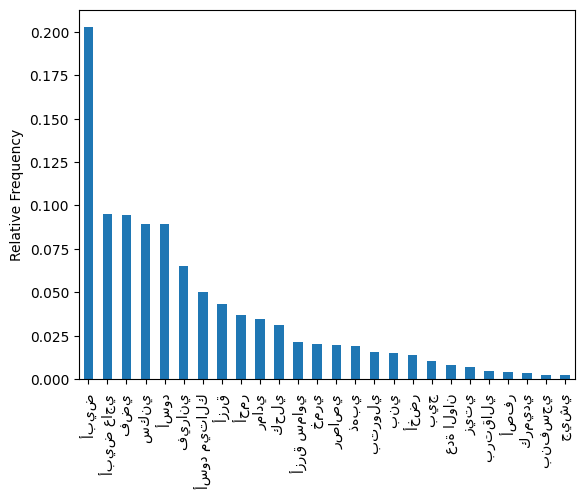

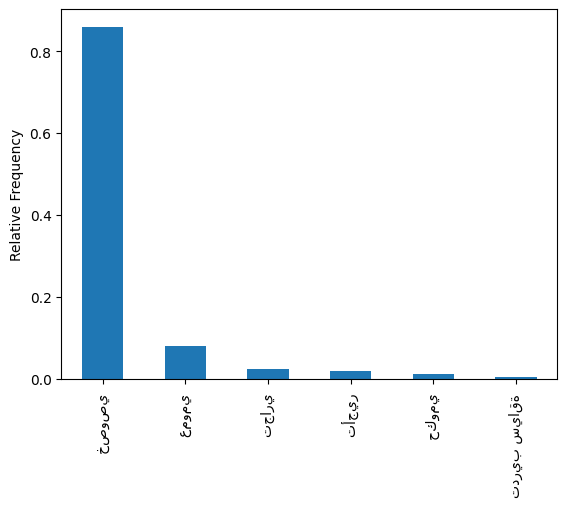

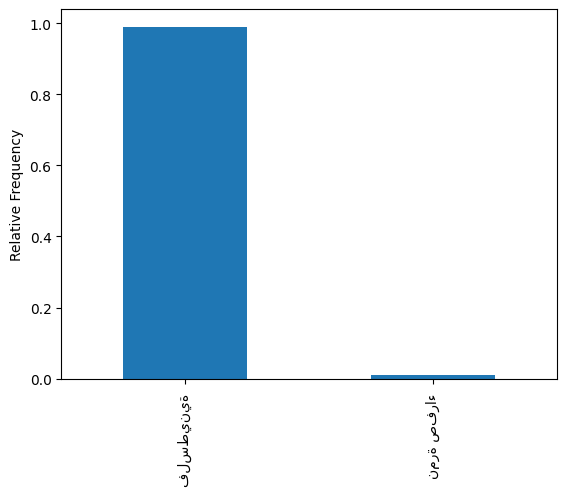

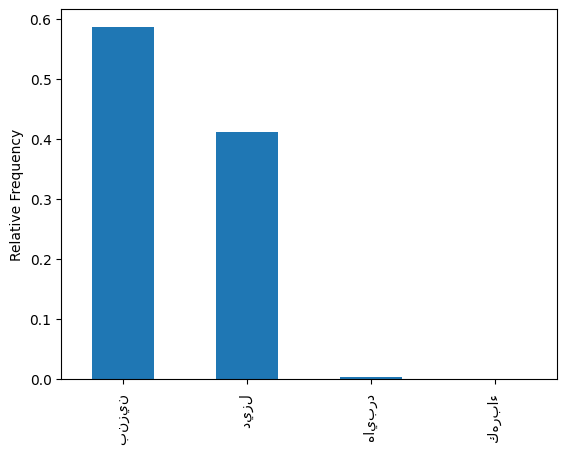

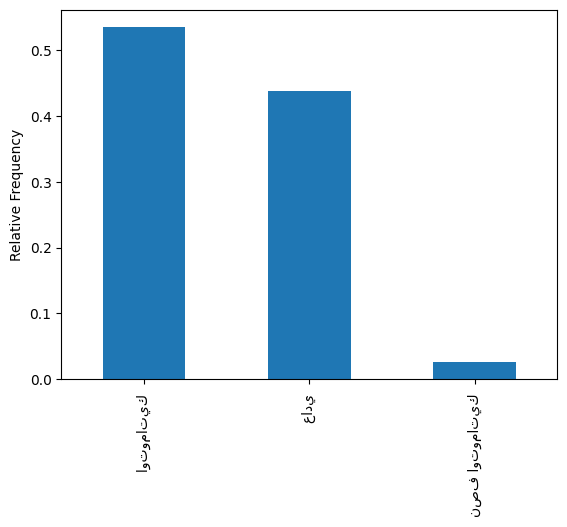

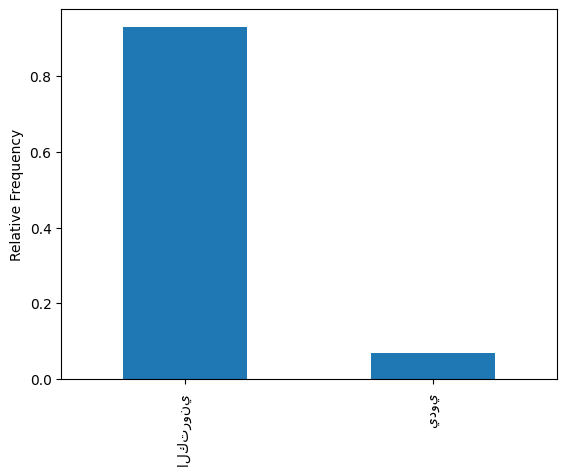

In [56]:
#Plot bar plot for each categorical feature
for feature in categorical_features:
    if feature == 'الموديل':
        continue
    else:   
        data[feature].value_counts(normalize=True).plot.bar()
        plt.ylabel("Relative Frequency")
        plt.show()

In [57]:
# a list of 8 additions columns names
additions = [
        'مُكيّف', 
        'إغلاق مركزي', 
        'جهاز إنذار', 
        'مسجل CD', 
        'فتحة سقف', 
        'جنطات مغنيسيوم', 
        'فرش جلد', 
        'وسادة حماية هوائية' 
        ]

In [58]:
#check value count for each addition 
data[additions].apply(pd.Series.value_counts) 

,مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,فتحة سقف,جنطات مغنيسيوم,فرش جلد,وسادة حماية هوائية
0,989,1156,2084,1000,4767,1698,3089,1420
1,5454,5287,4359,5443,1676,4745,3354,5023
